**Regression**

In [10]:


import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
#from sklearn import datasets
import matplotlib.pyplot as plt
# Seaborn for plotting and styling
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import uniform

In [11]:
warnings.filterwarnings("ignore")
pd.set_option('display.precision', 3)
pd.set_option("display.max_columns", None)
pd.option_context('mode.use_inf_as_na', True)

**Load data**

In [12]:
pd.set_option('display.precision', 3)

Bc=sklearn.datasets.load_diabetes()

**Put data in dataframes**

In [13]:
cols=Bc.feature_names
tv=pd.DataFrame(data=Bc.target,columns=['Outcome'])
df=pd.DataFrame(data=Bc.data,columns=cols)


**Dimensions of the data**

In [14]:
print(df.shape)
print(tv.shape)

(442, 10)
(442, 1)


The data consist of 442 instances,10 features and 1 target value.

**Data types of features and target value**

In [15]:
print(df.dtypes)
print(tv.dtypes)

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object
Outcome    float64
dtype: object


**Peak at data**

In [16]:
print(df.head(5))
print(tv.head(5))

     age    sex    bmi     bp     s1     s2     s3     s4     s5     s6
0  0.038  0.051  0.062  0.022 -0.044 -0.035 -0.043 -0.003  0.020 -0.018
1 -0.002 -0.045 -0.051 -0.026 -0.008 -0.019  0.074 -0.039 -0.068 -0.092
2  0.085  0.051  0.044 -0.006 -0.046 -0.034 -0.032 -0.003  0.003 -0.026
3 -0.089 -0.045 -0.012 -0.037  0.012  0.025 -0.036  0.034  0.023 -0.009
4  0.005 -0.045 -0.036  0.022  0.004  0.016  0.008 -0.003 -0.032 -0.047
   Outcome
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0


**Statistical summary of all attributes**

Features

In [18]:
df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02
mean,-2.512e-19,1.231e-17,-2.246e-16,-4.798e-17,-1.381e-17,3.918e-17,-5.777e-18,-9.043e-18,9.294e-17,1.130e-17
std,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02
min,-1.072e-01,-4.464e-02,-9.028e-02,-1.124e-01,-1.268e-01,-1.156e-01,-1.023e-01,-7.639e-02,-1.261e-01,-1.378e-01
25%,-3.730e-02,-4.464e-02,-3.423e-02,-3.666e-02,-3.425e-02,-3.036e-02,-3.512e-02,-3.949e-02,-3.325e-02,-3.318e-02
50%,5.383e-03,-4.464e-02,-7.284e-03,-5.670e-03,-4.321e-03,-3.819e-03,-6.584e-03,-2.592e-03,-1.947e-03,-1.078e-03
75%,3.808e-02,5.068e-02,3.125e-02,3.564e-02,2.836e-02,2.984e-02,2.931e-02,3.431e-02,3.243e-02,2.792e-02
max,1.107e-01,5.068e-02,1.706e-01,1.320e-01,1.539e-01,1.988e-01,1.812e-01,1.852e-01,1.336e-01,1.356e-01


Features have no missing values and their values are small in absolute value. Their scale differs.Most of the features have maximumm value an order of magnitude higher than theirs Q3.

In [19]:
tv.describe()

,Outcome
count,442.000
mean,152.133
std,77.093
min,25.000
25%,87.000
50%,140.500
75%,211.500
max,346.000


**Correlation Matrix**

In [20]:
df.corr(method='pearson')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
sex,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
bmi,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
bp,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
s1,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
s2,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
s3,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
s4,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
s5,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465
s6,0.302,0.208,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000


It is evident that strong correlation exists between certain features.Especialy s2,s3,s4 have high correlation.

**Univariate plots** (Features)

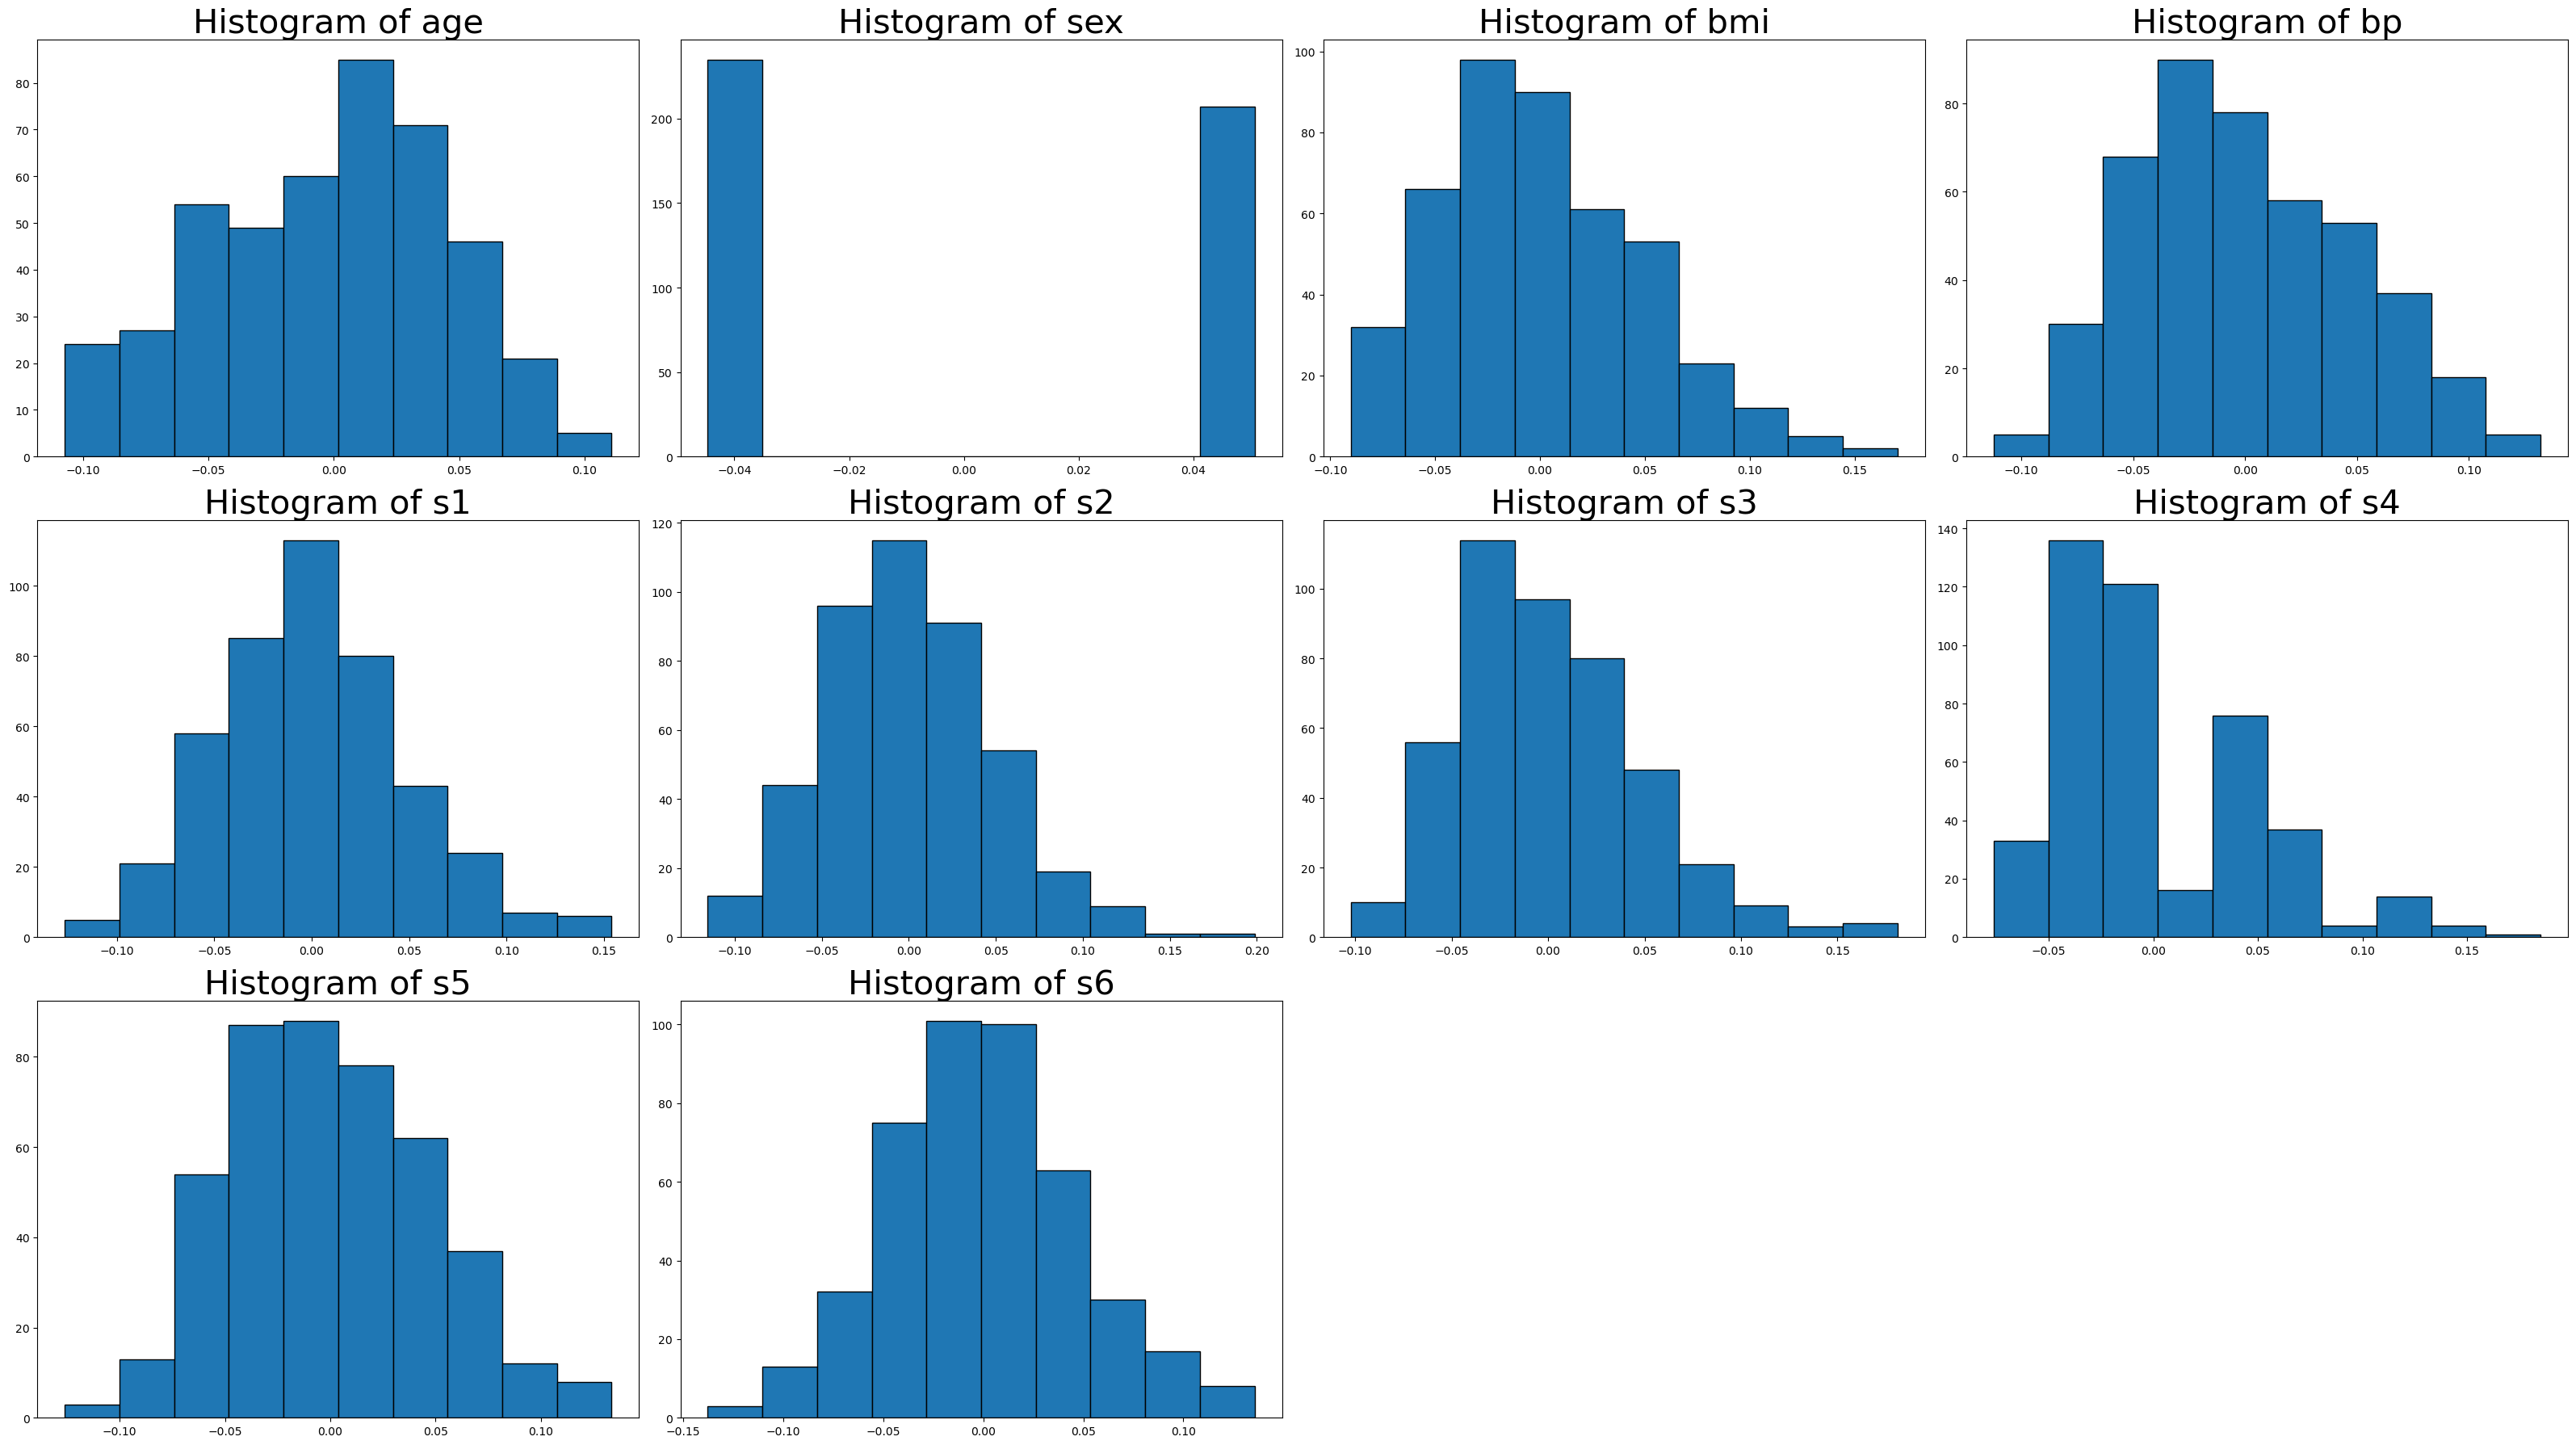

In [21]:
num_cols = len(df.columns)
cols = int(np.ceil(np.sqrt(num_cols)))  # Number of columns in the grid
rows = int(np.ceil(num_cols / cols))  # Number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=10, edgecolor='black')
    axes[i].set_title(f"Histogram of {column}", fontsize=30)  # Set smaller font size for title
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()

# Save the plot as an image
#fig.savefig("histograms_square.png")

# Show the plot
plt.show()

Most of the features have a single mode.Sex is binary but float so it is probably standardised.S4 has two modes.

**Histogram** (Target Value)

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

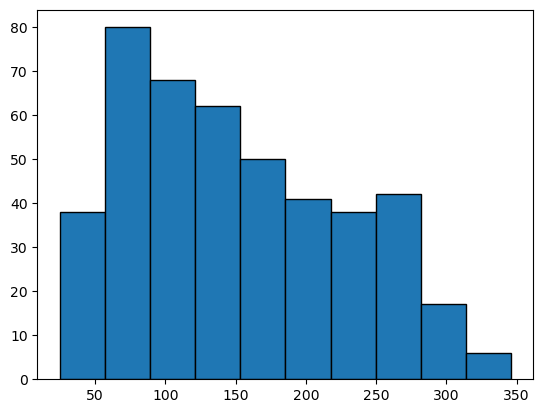

In [23]:
plt.hist(tv, bins=10, edgecolor='black')

**Density Plots**

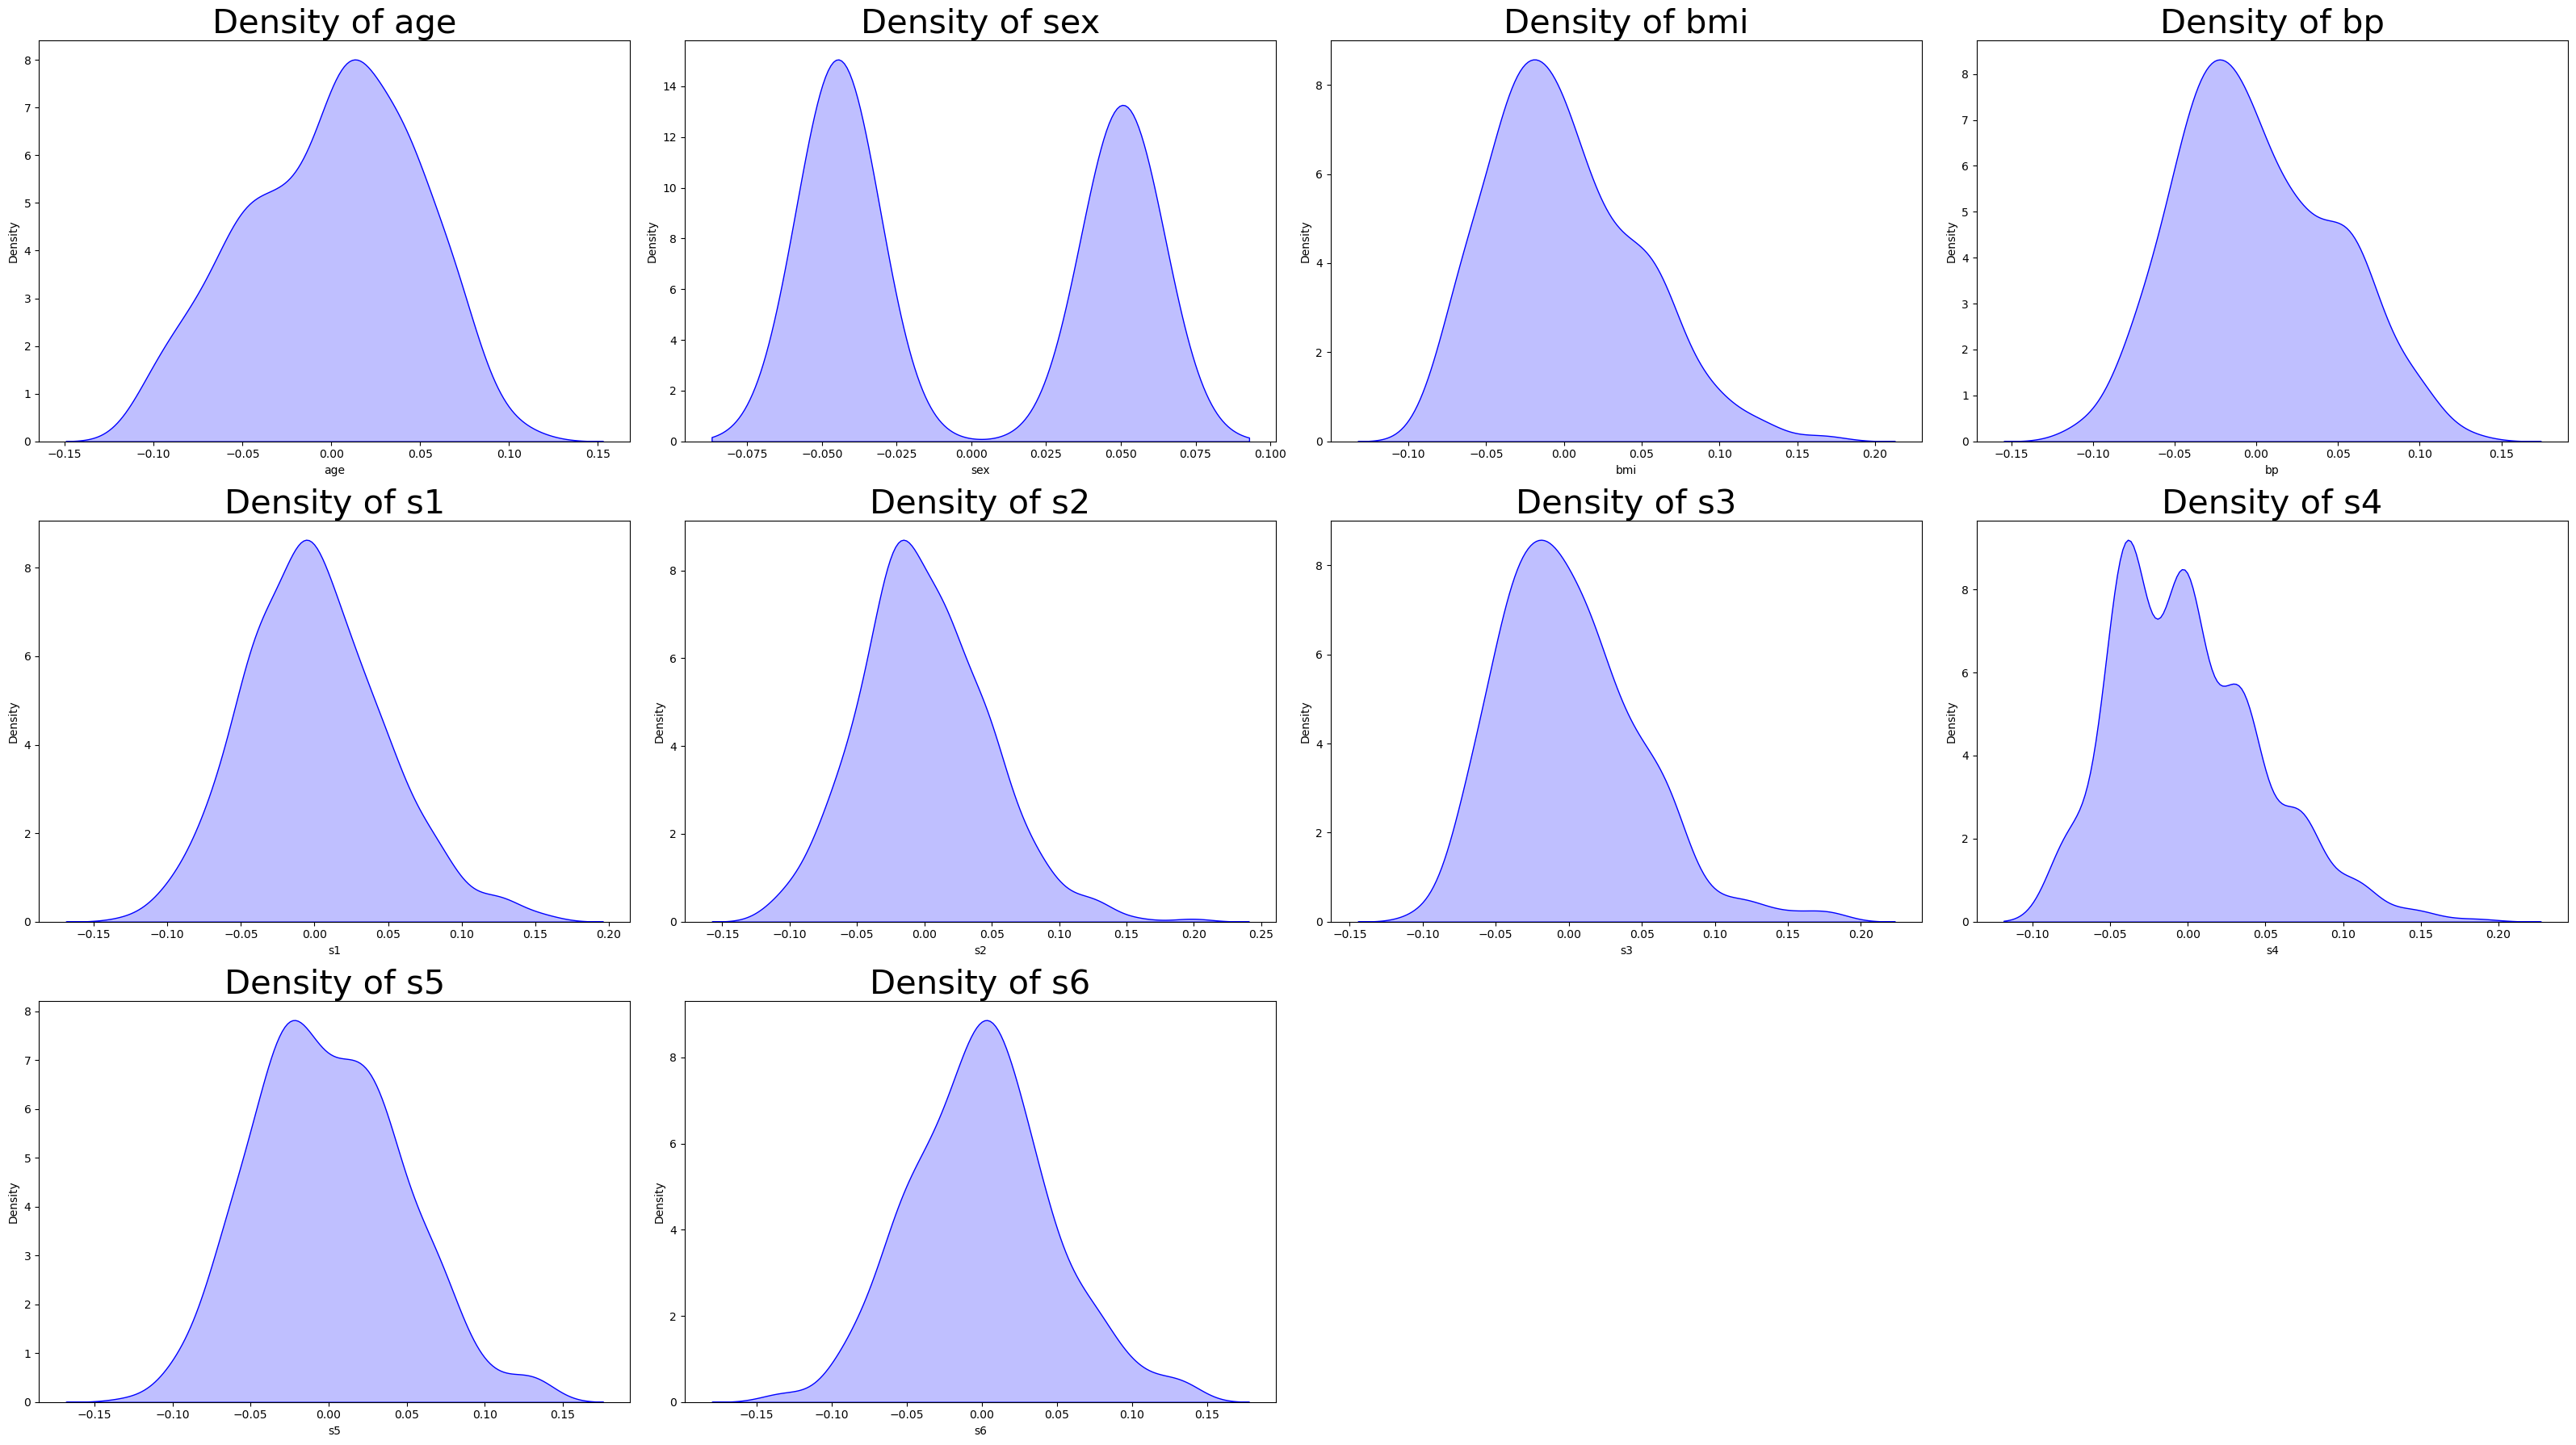

In [25]:

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column],ax=axes[i], fill=True, color="blue")
    axes[i].set_title(f"Density of {column}", fontsize=30)  # Set smaller font size for title
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()

# Save the plot as an image
#fig.savefig("histograms_square.png")

# Show the plot
plt.show()

**Box Plots**

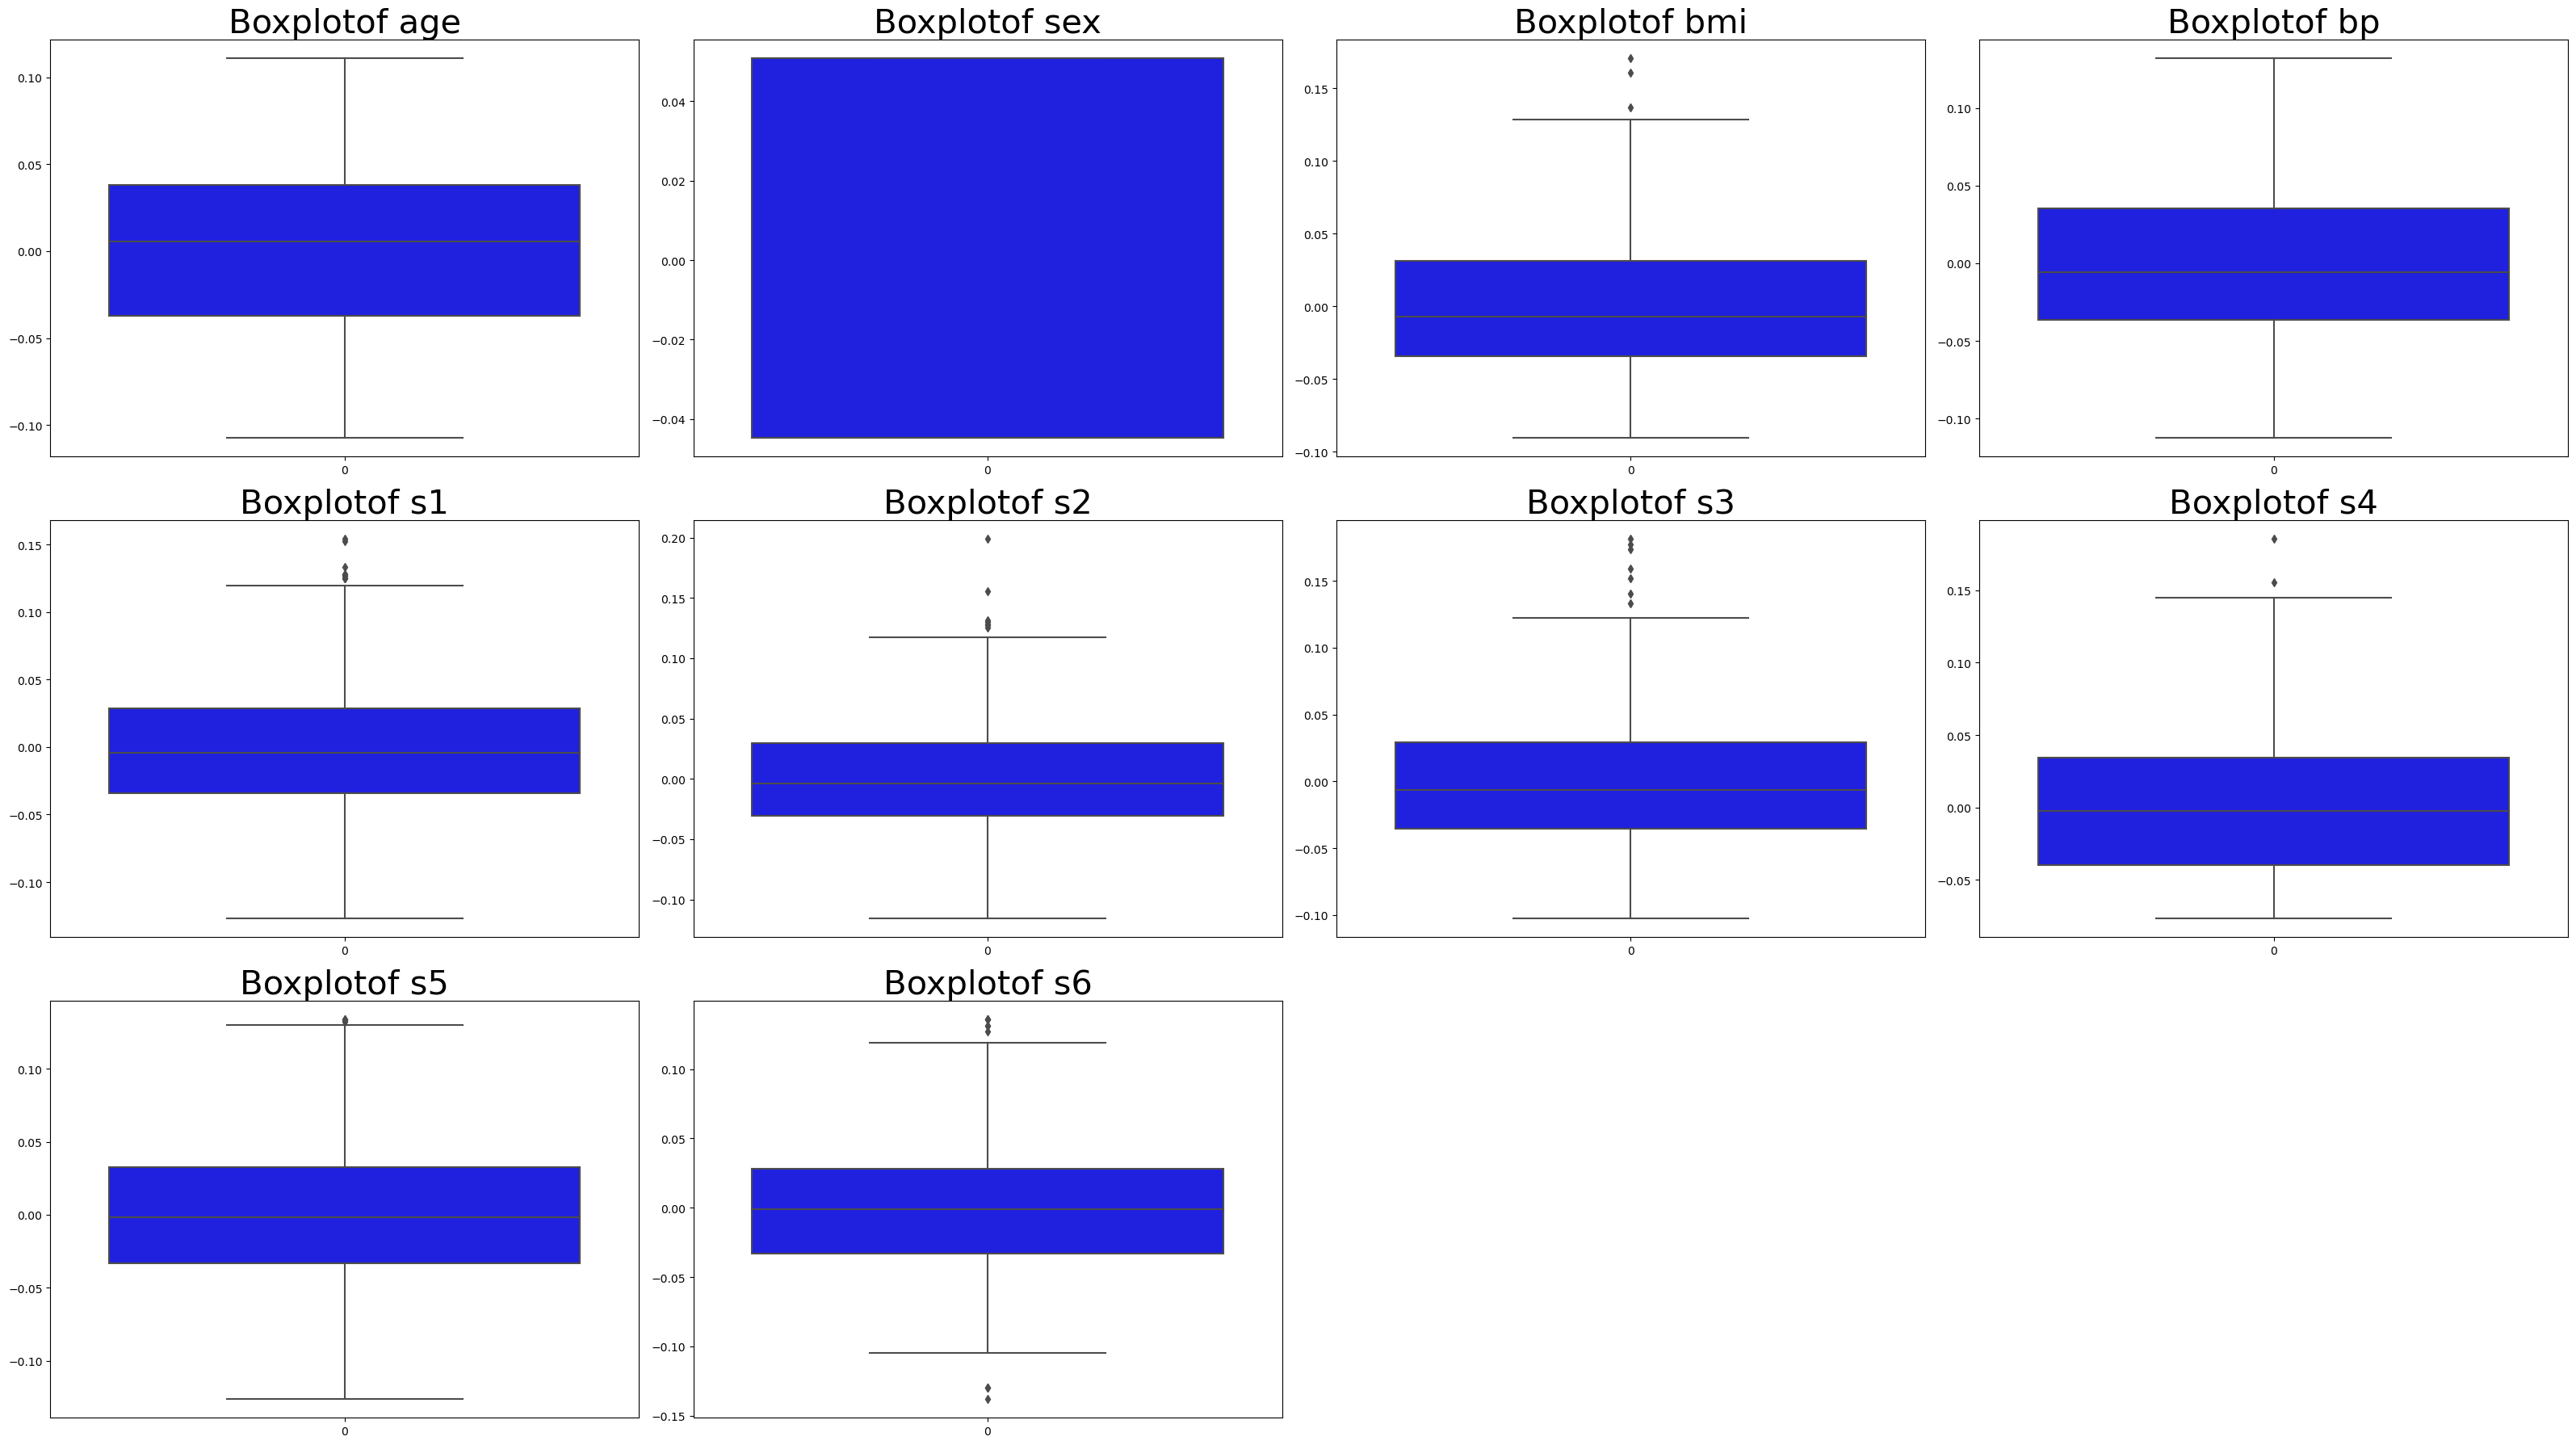

In [26]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    sns.boxplot(df[column],ax=axes[i], color="blue")
    axes[i].set_title(f"Boxplotof {column}", fontsize=30)  # Set smaller font size for title
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()

# Save the plot as an image
#fig.savefig("histograms_square.png")

# Show the plot
plt.show()


Some features have values that can be considered as outliers

<Axes: >

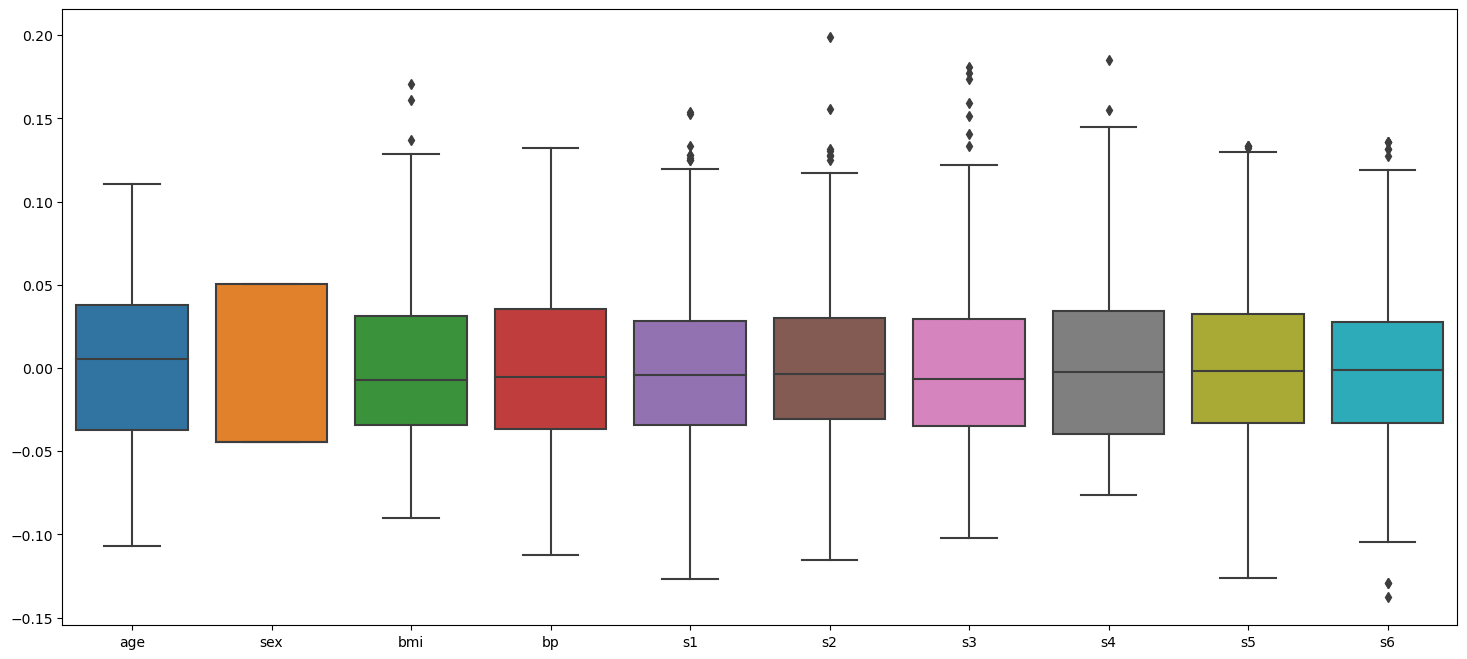

In [27]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=df)

Feature values are centered around 0.

**Correlation Heatmap**

<Axes: >

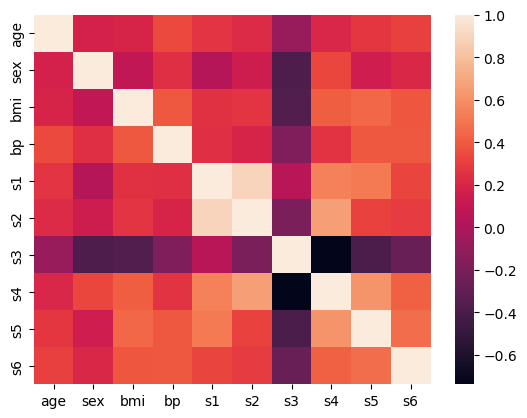

In [29]:
correlations = df.corr()
sns.heatmap(correlations)


Feature s3 is clearly correlated with all the features

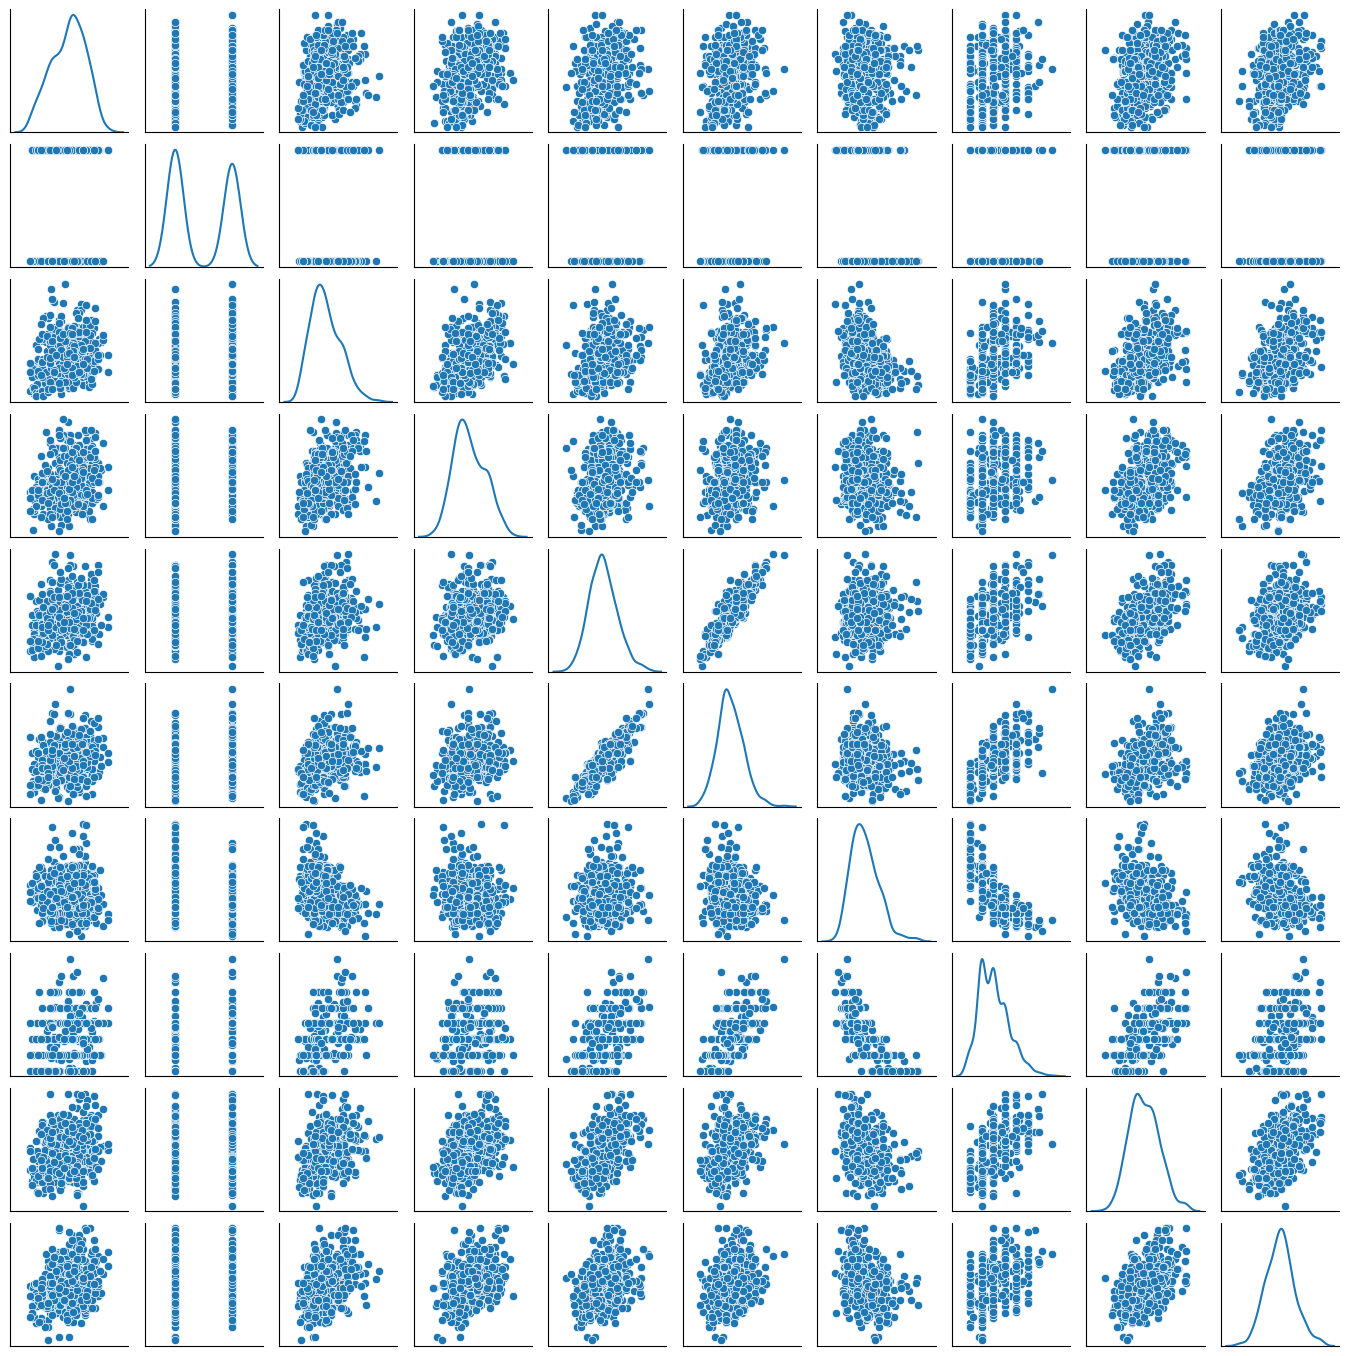

In [30]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_offdiag(sns.scatterplot)  # Scatter plots for off-diagonal
g.map_diag(sns.kdeplot) 

for ax in g.axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust figure size
g.fig.set_size_inches(14, 14)

plt.show()

**Features**

Strong correlation needs to be addressed.As a first step a check is performed to which features have correlation >0.7.Algorithms will be evaluated on
1)The Dataset as it is.
2)Combinations of removed features based on correlation.
3)PCA to remove correlation .
Models and scalers will be tested and the one that performes best wil be selected.Evaluation metric of choice :neg_MSE

In [46]:
threshold = 0.7
correlation_matrix = df.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1,len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check correlation
            colname = correlation_matrix.columns[i]  # Get the name of the feature
            correlated_features.add(colname)

print(correlated_features)

{'s3', 's1'}


**The whole dataset**

In [38]:
pca = PCA(n_components=5)

data_reduced=pca.fit_transform(X)


kfold = KFold(n_splits=5)

#Search between models and scalers
scalers=[None]
models=[LinearRegression(), Ridge(), Lasso(),ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor()]
resultsdfac=pd.DataFrame()
resultsstdac=pd.DataFrame()

resultsdff1=pd.DataFrame()
resultsstdf1=pd.DataFrame()

X = np.array(data_reduced)
Y=np.array(tv).ravel()

for model in models :
    
        X_1 = X
            
        r1 = cross_val_score(model, X_1, Y, cv=kfold,scoring='neg_mean_squared_error')      
        resultsdfac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.mean()  
        resultsstdac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.std() 
print(resultsdfac) 

                       StandardScaler
LinearRegression            -3125.702
Ridge                       -3556.955
Lasso                       -4218.981
ElasticNet                  -5927.568
KNeighborsRegressor         -3696.661
DecisionTreeRegressor       -6523.625


**PCA**

In [39]:
kfold = KFold(n_splits=5)




X = np.array(df.values)
Y=np.array(tv).ravel()

#Search between models and scalers
scalers=[None,Normalizer(),MinMaxScaler(feature_range=(0, 1)),StandardScaler()]
models=[LinearRegression(), Ridge(), Lasso(),ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor()]
resultsdfac=pd.DataFrame()
resultsstdac=pd.DataFrame()

resultsdff1=pd.DataFrame()
resultsstdf1=pd.DataFrame()

X = np.array(df.values)
Y=np.array(tv).ravel()

for model in models :
    for scaler in scalers :
        if scaler :
            X_1=scaler.fit_transform(X)
        else:
            X_1 = X
            
        r1 = cross_val_score(model, X_1, Y, cv=kfold,scoring='neg_mean_squared_error')      
        resultsdfac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.mean()  
        resultsstdac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.std() 
        
print(resultsdfac)

                       NoneType  Normalizer  MinMaxScaler  StandardScaler
LinearRegression      -2993.081   -3063.547     -2993.081       -2993.081
Ridge                 -3420.324   -3053.033     -3000.846       -2993.639
Lasso                 -3850.838   -3073.600     -3057.583       -2994.075
ElasticNet            -5930.200   -4490.878     -5200.489       -3139.593
KNeighborsRegressor   -3620.916   -3452.932     -3587.412       -3620.916
DecisionTreeRegressor -6659.634   -6227.175     -6862.871       -6451.973


**With s3 droppped**

In [42]:
data_reduced = df.drop(columns=['s3'])

kfold = KFold(n_splits=5)




#Search between models and scalers
scalers=[None,Normalizer(),MinMaxScaler(feature_range=(0, 1)),StandardScaler()]
models=[LinearRegression(), Ridge(), Lasso(),ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor()]
resultsdfac=pd.DataFrame()
resultsstdac=pd.DataFrame()

resultsdff1=pd.DataFrame()
resultsstdf1=pd.DataFrame()

X = np.array(data_reduced.values)
Y=np.array(tv).ravel()

for model in models :
    for scaler in scalers :
        if scaler :
            X_1=scaler.fit_transform(X)
        else:
            X_1 = X
            
        r1 = cross_val_score(model, X_1, Y, cv=kfold,scoring='neg_mean_squared_error')      
        resultsdfac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.mean()  
        resultsstdac.loc[model.__class__.__name__,scaler.__class__.__name__]=r1.std() 
print(resultsdfac)      

                       NoneType  Normalizer  MinMaxScaler  StandardScaler
LinearRegression      -2988.704   -3046.222     -2988.704       -2988.704
Ridge                 -3500.317   -3041.917     -3008.650       -2988.487
Lasso                 -3850.838   -3099.116     -3157.964       -2991.954
ElasticNet            -5935.527   -4490.701     -5258.914       -3189.261
KNeighborsRegressor   -3572.422   -3563.662     -3553.039       -3572.422
DecisionTreeRegressor -6658.468   -6054.300     -6665.640       -7037.241


Different combinations of dropped parameters were tested. (Dropping only s3 performed the best).Hyperparameter tuning will be performed on the combination that performed the best:Ridge regression with standard scaler on the dataset without s3.

**Hyperparameter tuning**

In [53]:
param_grid = {
    'alpha': np.logspace(-6, 6, 13),      # Regularization strength
   
        
    
   
}

X = np.array(data_reduced.values)
Y=np.array(tv).ravel()

ridge = Ridge()
scaler=StandardScaler()
X_1=scaler.fit_transform(X)
random_search = RandomizedSearchCV(ridge, param_distributions=param_grid,  cv=5,scoring='neg_mean_squared_error')
random_search.fit(X_1, Y)
print(random_search.best_score_)
best_model = random_search.best_estimator_

-2988.486720436144


The final model score is -2988.486720436144